# < 과제 #2 : Numpy/Pandas/Matplotlib > 

## 빅데이터분석 B
## 컴퓨터 공학부 201858036 박현수

In [81]:
# 총 import 내용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import math

## [A] Numpy

### 1)  모양이 (20, )인 4개의 1차원 배열 a, b, c, d를 만드시오. 

In [82]:
# a : 처음 15개는 3, 나머지 5개는 4인 배열
grid1 = np.full((15), 3); grid2 = np.full((5), 4)
a = np.concatenate([grid1, grid2])

# b : 정수 집합 {1, 2}에서 랜덤하게 뽑은 난수 배열(단, seed는 1로 설정)
np.random.seed(1)
b = np.random.randint(1, 3, size=20)

# c : 정수 집합 {1, 2, ... , 99, 100}에서 랜덤하게 뽑은 난수 배열(단 seed는 2로 설정)
np.random.seed(2)
c = np.random.randint(1, 101, size=20)

# d : [0, 1) 구간에서 뽑은 난수 배열(단, seed는 3으로 설정)에 대하여 100을 곱한 후, 칼럼으로 이어 붙여 모양이 (20, 4)인 2차원 배열 m을 만드시오.
np.random.seed(3)
d = np.random.random(20)
d = np.trunc(d * 100) + 1

In [83]:
print(a, b, c, d, sep='\n')

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4]
[2 2 1 1 2 2 2 2 2 1 1 2 1 2 2 1 1 2 1 1]
[41 16 73 23 44 83 76  8 35 50 96 76 86 48 64 32 91 21 38 40]
[56. 71. 30. 52. 90. 90. 13. 21.  6. 45.  3. 46. 65. 28. 68. 60.  3. 56.
 26. 42.]


### 2)  1)에서 만든 4개의 1차원 배열을 각각 2차원 배열, 즉 모양이 (20,1)이 되도록 재구조화한 후, 칼럼으로 이어 붙여 모양이 (20,4)인 2차원 배열 m을 만드시오.

In [84]:
a = a.reshape(-1, 1); b = b.reshape(-1, 1)
c = c.reshape(-1, 1); d = d.reshape(-1, 1)

In [85]:
m = np.hstack((a, b, c, d))
print(m)

[[ 3.  2. 41. 56.]
 [ 3.  2. 16. 71.]
 [ 3.  1. 73. 30.]
 [ 3.  1. 23. 52.]
 [ 3.  2. 44. 90.]
 [ 3.  2. 83. 90.]
 [ 3.  2. 76. 13.]
 [ 3.  2.  8. 21.]
 [ 3.  2. 35.  6.]
 [ 3.  1. 50. 45.]
 [ 3.  1. 96.  3.]
 [ 3.  2. 76. 46.]
 [ 3.  1. 86. 65.]
 [ 3.  2. 48. 28.]
 [ 3.  2. 64. 68.]
 [ 4.  1. 32. 60.]
 [ 4.  1. 91.  3.]
 [ 4.  2. 21. 56.]
 [ 4.  1. 38. 26.]
 [ 4.  1. 40. 42.]]


### 3) 배열 m에 대하여 열별 평균을 구하시오.

In [86]:
avgsM = np.mean(m, axis=0)
print(avgsM)

[ 3.25  1.55 52.05 43.55]


### 4) 0번째 칼럼의 값이 3인, 즉 처음 15개의 행을 취하여 m3를 만들고 각 열의 평균을 구하시오.

In [87]:
m3 = m[np.where(m[:, 0] == 3)]
m3.mean(axis=0)

array([ 3.        ,  1.66666667, 54.6       , 45.6       ])

### 5) 1번째 칼럼의 값이 1인 행을 취하여 m1을 만들고 각 열의 최댓값을 구하시오.

In [88]:
m1 = m[np.where(m[:, 1] == 1)]

In [89]:
print(np.max(m1, axis=0))

[ 4.  1. 96. 65.]


### 6) 3번째 열의 값이 2번째 열의 값보다 더 큰 행의 행 인덱스를 구하시오.

In [90]:
np.where(m[:, 3] > m[:, 2])

(array([ 0,  1,  3,  4,  5,  7, 14, 15, 17, 19], dtype=int64),)

# 

## [B] Pandas

### 1) 타이타닉 데이터 파일을 읽어 titanic 데이터프레임을 만든 후, Name, Ticket, Cabin 칼럼을 삭제한 titanic2 데이터프레임을 만들어 마지막 3개의 행을 출력하시오.

In [91]:
titanic = pd.read_csv('titanic.csv')

In [92]:
titanic2 = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic2.tail(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


### 2) titanic2에는 Age와 Embarked 칼럼에 결측치가 존재한다. Age의 결측치는 평균으로 대체하고, Embarked는 가장 많이 출현하는 값으로 대체하여 titanic3 데이터프레임을 만드시오. (참고 : fillna 메서드 도움말 예제)

In [93]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [94]:
titanic3 = titanic2.fillna({'Age':titanic2['Age'].mean(),'Embarked':titanic2['Embarked'].mode()[0]})

In [95]:
titanic3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### 3) titanic3 데이터프레임에 대하여 아래 집계를 실시하시오.

#### > Survived 그룹별 분포(개수)

In [96]:
titanic3.groupby('Survived').count()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342


#### > Survived 그룹별 Age 평균

In [97]:
titanic3.groupby('Survived')[['Age']].mean()

,Age
Survived,
0,30.415100
1,28.549778


#### > Pclass 그룹별 분포, 단 Pclass 번호순으로 정렬

In [98]:
titanic3.sort_values(by=['Pclass'], ascending=True).groupby(['Pclass']).count()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,,
1,216,216,216,216,216,216,216,216
2,184,184,184,184,184,184,184,184
3,491,491,491,491,491,491,491,491


#### > Survived × Pclass 별 분포(개수)

In [99]:
titanic3.groupby(['Survived','Pclass']).count()

PassengerId  Sex  Age  SibSp  Parch  Fare  Embarked
Survived Pclass                                                     
0        1                80   80   80     80     80    80        80
         2                97   97   97     97     97    97        97
         3               372  372  372    372    372   372       372
1        1               136  136  136    136    136   136       136
         2                87   87   87     87     87    87        87
         3               119  119  119    119    119   119       119

### 4) titanic3으로부터 Age>70인 행만 추출하여 titanic4를 만들고, titanic으로부터 PassengerId와 Name만을 추출한 titanic4를 만들어 두 데이터프레임을 PassengerId를 키로 하여 내부조인하시오.

In [100]:
titanic4 = titanic3.loc[titanic3.Age > 70]

In [101]:
titanic5 = titanic[['PassengerId', 'Name']]

In [102]:
pd.merge(titanic4, titanic5, how='inner', on='PassengerId')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,97,0,1,male,71.0,0,0,34.6542,C,"Goldschmidt, Mr. George B"
1,117,0,3,male,70.5,0,0,7.7500,Q,"Connors, Mr. Patrick"
2,494,0,1,male,71.0,0,0,49.5042,C,"Artagaveytia, Mr. Ramon"
3,631,1,1,male,80.0,0,0,30.0000,S,"Barkworth, Mr. Algernon Henry Wilson"
4,852,0,3,male,74.0,0,0,7.7750,S,"Svensson, Mr. Johan"


# 

## [C] Matplotlib

### ThoraricSurgery.csv 파일은 폐암 수술 환자의 수술 전 진단 데이터(17개 : 종양의 유형, 폐활량, 호흡 곤란 여부, 고통 정도, 기침, 흡연, 천식 여부 등)와 수술 후 생존 결과(Risk1Yr)를 기록한 의료 기록 데이터이다. 파일을 읽어 데이터프레임을 생성한 후 아래 차트를 작성하시오.

In [103]:
ts = pd.read_csv('ThoraricSurgery.csv')

### 1) AGE와 PRE4의 산점도

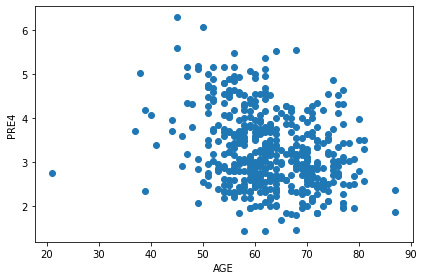

In [104]:
plt.scatter(ts.AGE, ts.PRE4)
plt.xlabel('AGE')
plt.ylabel('PRE4')
plt.tight_layout()

### 2) AGE에 대한 히스토그램(#1:디폴트, #2:bins 설정(10대, 20대, ..., 90대))

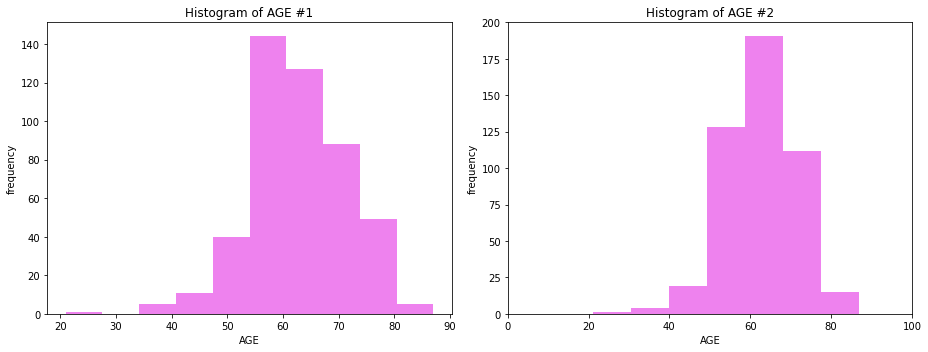

In [105]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.hist(ts.AGE, color='violet')
plt.title('Histogram of AGE #1')
plt.xlabel('AGE')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.hist(ts.AGE, color='violet', bins=7)
plt.xlim((0, 100))
plt.ylim((0, 200))
plt.title('Histogram of AGE #2')
plt.xlabel('AGE')
plt.ylabel('frequency')

plt.tight_layout()

### 3) Risk1Yr에 대한 파이차트(pie chart)

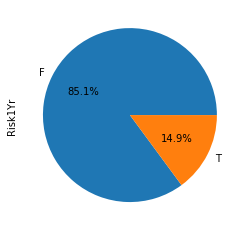

In [106]:
ts['Risk1Yr'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

### 4) PRE14별 PRE5 평균의 막대그래프(bar chart)

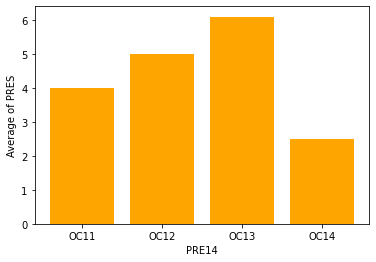

In [108]:
AoP = ts.groupby('PRE14').PRE5.mean()

label = ["OC11", "OC12", "OC13", "OC14"]
index = np.arange(len(label))

plt.bar(index, AoP, color="orange")
plt.xticks(index, label)

plt.xlabel("PRE14")
plt.ylabel("Average of PRES")

plt.show()